## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

Shape: (75699, 7)
Columns: ['year', 'id_', 'satfrnd', 'contv', 'tvhours', 'newsfrom', 'ballot']
               year           id_
count  75699.000000  75699.000000
mean    1998.864503   1259.858598
std       15.722971    918.088290
min     1972.000000      1.000000
25%     1986.000000    543.000000
50%     1998.000000   1100.000000
75%     2012.000000   1766.000000
max     2024.000000   4510.000000

News source distribution:
newsfrom
.i:  Inapplicable                  0.797738
.y:  Not available in this year    0.090530
Tv                                 0.049948
The internet                       0.032814
Newspaper                          0.016130
Radio                              0.006684
Family                             0.002061
Friends/colleagues                 0.001849
Magazines                          0.000766
Books/other printed material       0.000502
Other                              0.000462
Government agencies                0.000198
.n:  No answer                    

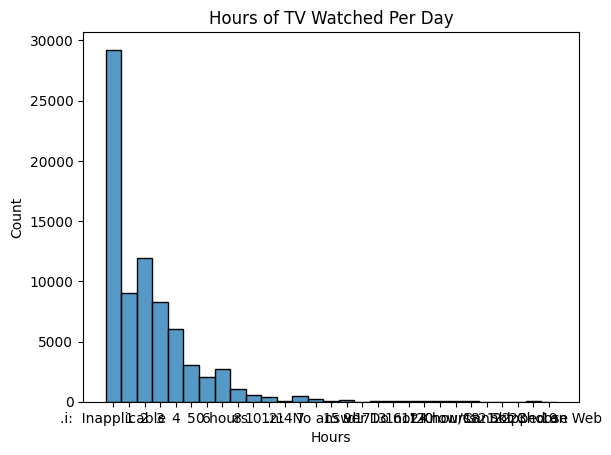

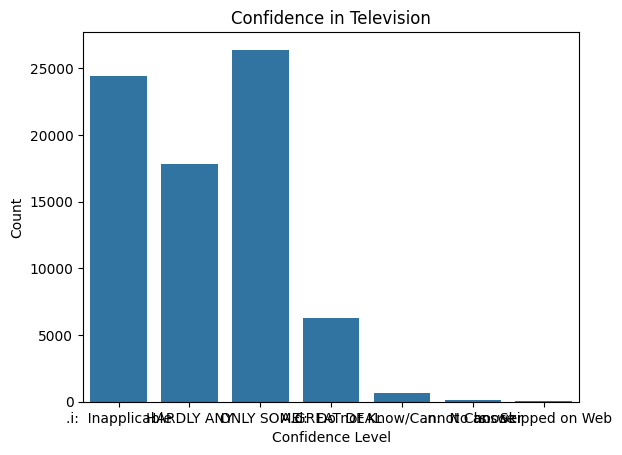

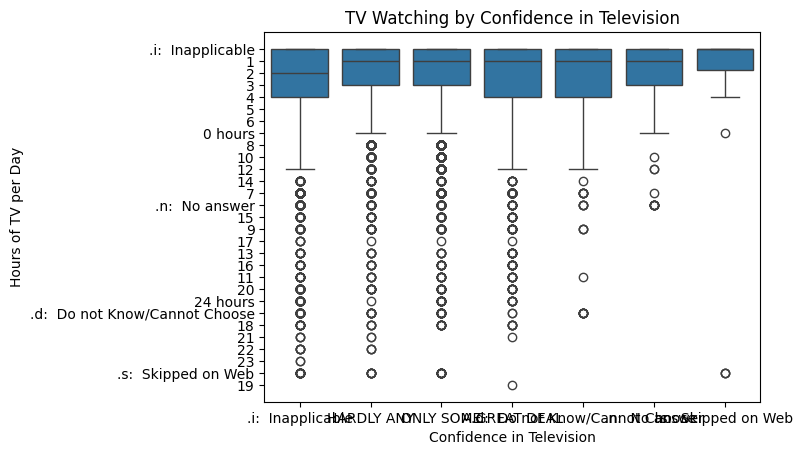

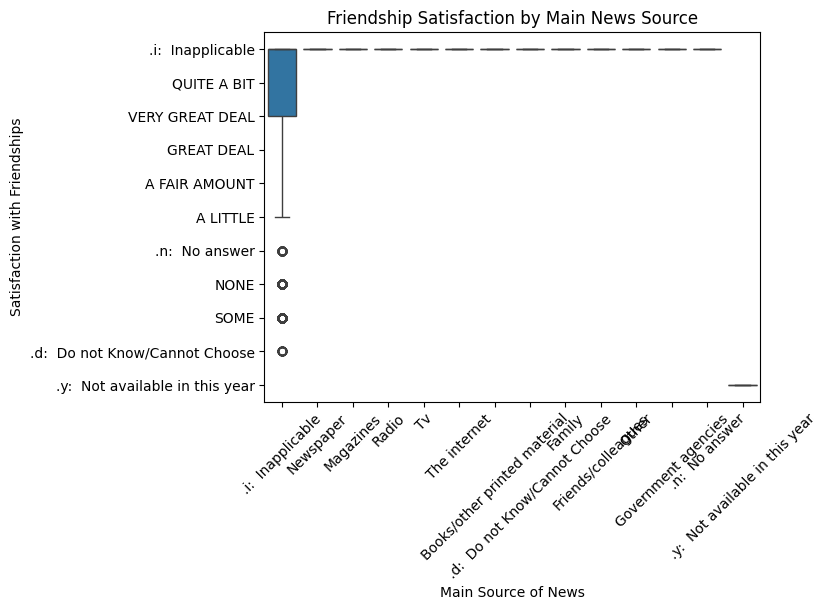

/tmp/ipython-input-3991395642.py:82: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='tvhours', data=df, ci=None)


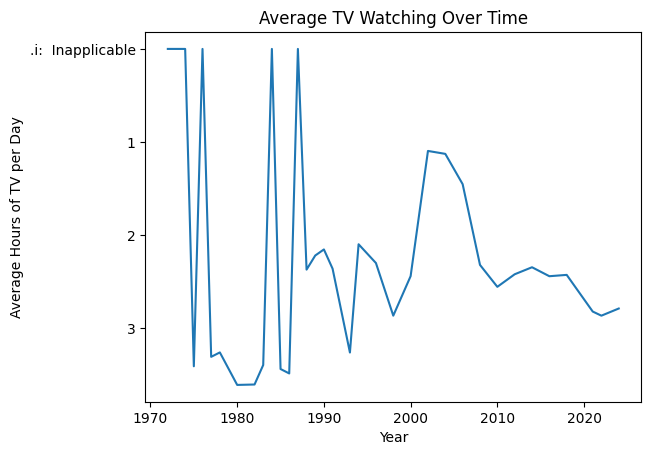

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/content/GSS1.xlsx")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

required_cols = ['tvhours', 'contv', 'satfrnd', 'newsfrom', 'year']
missing = [c for c in required_cols if c not in df.columns]

if missing:
    raise ValueError(f"Missing expected columns: {missing}")

# -----------------------------
# Clean GSS missing codes
# -----------------------------
missing_codes = [-1, -2, -3, -4, -5, -9]
df = df.replace(missing_codes, np.nan)

# Keep rows with key EDA variables
df = df.dropna(subset=['tvhours', 'contv', 'satfrnd'])


print(df.describe())

print("\nNews source distribution:")
print(df['newsfrom'].value_counts(normalize=True))

print("\nFriendship satisfaction distribution:")
print(df['satfrnd'].value_counts(normalize=True))



# TV hours distribution
plt.figure()
sns.histplot(df['tvhours'], bins=30)
plt.title("Hours of TV Watched Per Day")
plt.xlabel("Hours")
plt.ylabel("Count")
plt.show()

# Confidence in television
plt.figure()
sns.countplot(x='contv', data=df)
plt.title("Confidence in Television")
plt.xlabel("Confidence Level")
plt.ylabel("Count")
plt.show()

# TV hours by confidence in television
plt.figure()
sns.boxplot(x='contv', y='tvhours', data=df)
plt.title("TV Watching by Confidence in Television")
plt.xlabel("Confidence in Television")
plt.ylabel("Hours of TV per Day")
plt.show()

# Friendship satisfaction by news source
plt.figure()
sns.boxplot(x='newsfrom', y='satfrnd', data=df)
plt.xticks(rotation=45)
plt.title("Friendship Satisfaction by Main News Source")
plt.xlabel("Main Source of News")
plt.ylabel("Satisfaction with Friendships")
plt.show()

# Average TV hours over time
plt.figure()
sns.lineplot(x='year', y='tvhours', data=df, ci=None)
plt.title("Average TV Watching Over Time")
plt.xlabel("Year")
plt.ylabel("Average Hours of TV per Day")
plt.show()


The distribution of daily television viewing is strongly right-skewed, with most respondents reporting relatively low to moderate levels of television consumption and a smaller subset reporting substantially higher viewing hours. This pattern is typical of time-use variables and highlights meaningful heterogeneity in media consumption habits. Confidence in television as an institution is more evenly distributed across response categories, with many respondents expressing moderate confidence rather than strong trust or strong skepticism. Together, these distributions suggest that television remains a common feature of daily life, but attitudes toward it vary considerably across the population.

Exploratory comparisons reveal no simple or monotonic relationship between hours of television watched and confidence in television. Respondents with differing levels of confidence display wide variation in viewing behavior, indicating that heavier television consumption does not straightforwardly correspond to higher trust in the medium. Differences in reported friendship satisfaction across primary news sources are present but modest, with substantial overlap between groups. These patterns suggest that while media consumption and media attitudes are related to social well-being in complex ways, the observed associations are descriptive rather than causal. Overall, the results underscore the value of exploratory data analysis in revealing nuanced relationships prior to any formal modeling.